In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 35716645.56it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1209554.70it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 9734727.87it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 8229170.09it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [6]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [7]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),

    'test': DataLoader(test_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1)
}

In [9]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7bf2ca6b20e0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7bf2ca6b1690>}

In [10]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)

    return F.softmax(x)

In [11]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Net().to(device)

optimizer = optim.Adam(model.parameters(), lr=.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()

    if batch_idx % 20 == 0:
      print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
  model.eval()

  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print(f'\nTest set: Average Loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')

In [12]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-10-d585c24776b0>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.301772
Train Epoch: 1 [2000/60000 (3%)]	2.293750
Train Epoch: 1 [4000/60000 (7%)]	2.179264
Train Epoch: 1 [6000/60000 (10%)]	2.009672
Train Epoch: 1 [8000/60000 (13%)]	1.885741
Train Epoch: 1 [10000/60000 (17%)]	1.809276
Train Epoch: 1 [12000/60000 (20%)]	1.820943
Train Epoch: 1 [14000/60000 (23%)]	1.822543
Train Epoch: 1 [16000/60000 (27%)]	1.810094
Train Epoch: 1 [18000/60000 (30%)]	1.744317
Train Epoch: 1 [20000/60000 (33%)]	1.699646
Train Epoch: 1 [22000/60000 (37%)]	1.675601
Train Epoch: 1 [24000/60000 (40%)]	1.660053
Train Epoch: 1 [26000/60000 (43%)]	1.754182
Train Epoch: 1 [28000/60000 (47%)]	1.684759
Train Epoch: 1 [30000/60000 (50%)]	1.640517
Train Epoch: 1 [32000/60000 (53%)]	1.645455
Train Epoch: 1 [34000/60000 (57%)]	1.640565
Train Epoch: 1 [36000/60000 (60%)]	1.601253
Train Epoch: 1 [38000/60000 (63%)]	1.635584
Train Epoch: 1 [40000/60000 (67%)]	1.661337
Train Epoch: 1 [42000/60000 (70%)]	1.573165
Train Epoch: 1 [44000/60000 (73%)]	1.645064

In [13]:
device

device(type='cpu')

Prediction: 7


<ipython-input-10-d585c24776b0>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


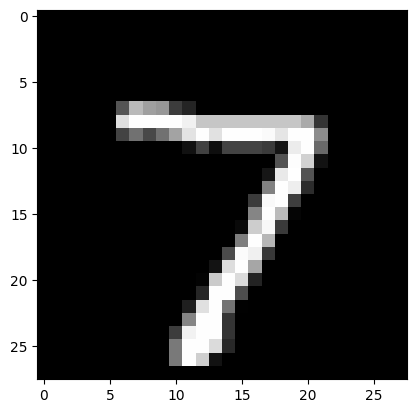

In [18]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[0]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f"Prediction: {prediction}")

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

In [17]:
test()

<ipython-input-10-d585c24776b0>:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)



Test set: Average Loss: 0.0149, Accuracy 9757/10000 (98%
)
